# 공공 인공지능 Open API 활용

In [1]:
with open('etriaikey.txt') as file:
    ai_key = file.read()

### 객체 검출
#### 1. 하나의 객체 검출

In [2]:
# JFIF 타입은 JPG로 변경
img_file = '사진/girl.png'
img_type = img_file.split(".")[-1]
img_type = 'jpg' if img_type == 'jfif' else img_type

In [3]:
import urllib3, json, base64
openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"

In [6]:
with open(img_file, 'rb') as file:
    img_contents = base64.b64encode(file.read()).decode("utf8")
img_contents[-10:]

'VORK5CYII='

In [7]:
requestJson = {
    "access_key": ai_key,
    "argument": {
        "type": img_type,
        "file": img_contents
    }
}

In [8]:
http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(requestJson)
)

In [9]:
response.status

200

In [10]:
response.data

b'{"result":0,"return_object":{"data":[{"class":"person","confidence":"0.995850","x":"18","y":"6","width":"761","height":"645"},{"class":"chair","confidence":"0.947967","x":"12","y":"230","width":"126","height":"216"},{"class":"remote","confidence":"0.693228","x":"76","y":"317","width":"140","height":"144"}]}}'

In [11]:
result = json.loads(response.data)
result

{'result': 0,
 'return_object': {'data': [{'class': 'person',
    'confidence': '0.995850',
    'x': '18',
    'y': '6',
    'width': '761',
    'height': '645'},
   {'class': 'chair',
    'confidence': '0.947967',
    'x': '12',
    'y': '230',
    'width': '126',
    'height': '216'},
   {'class': 'remote',
    'confidence': '0.693228',
    'x': '76',
    'y': '317',
    'width': '140',
    'height': '144'}]}}

In [12]:
obj_list = result['return_object']['data']
obj_list[0]

{'class': 'person',
 'confidence': '0.995850',
 'x': '18',
 'y': '6',
 'width': '761',
 'height': '645'}

- 시각화

In [13]:
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

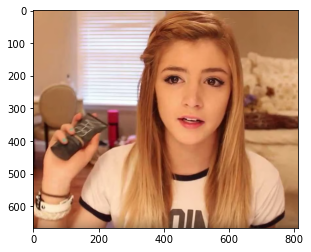

In [17]:
img = Image.open(img_file)
plt.imshow(img);

In [18]:
draw = ImageDraw.Draw(img)
obj = obj_list[0]
name = obj['class']
x = int(obj['x'])
y = int(obj['y'])
w = int(obj['width'])
h = int(obj['height'])
draw.rectangle(((x,y), (x+w,y+h)), outline=(255,0,0), width=1)
draw.text((x+10, y+10), name, font=ImageFont.truetype('malgun.ttf',30), fill=(255,0,0))

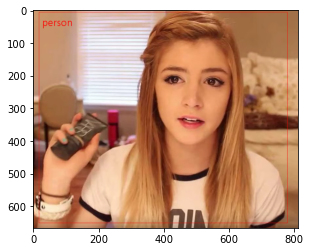

In [19]:
plt.imshow(img);

#### 2. 여러개의 객체 검출

In [21]:
# JFIF 타입은 JPG로 변경
img_file = '사진/meme.jpg'
img_type = img_file.split(".")[-1]
img_type = 'jpg' if img_type == 'jfif' else img_type

import urllib3, json, base64
openApiURL = "http://aiopen.etri.re.kr:8000/ObjectDetect"

with open(img_file, 'rb') as file:
    img_contents = base64.b64encode(file.read()).decode("utf8")
img_contents[-10:]

requestJson = {
    "access_key": ai_key,
    "argument": {
        "type": img_type,
        "file": img_contents
    }
}

http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(requestJson)
)

response.data

b'{"result":0,"return_object":{"data":[{"class":"person","confidence":"0.998165","x":"746","y":"126","width":"2198","height":"1888"},{"class":"sports ball","confidence":"0.678648","x":"401","y":"1519","width":"293","height":"295"},{"class":"cup","confidence":"0.985585","x":"446","y":"1059","width":"353","height":"287"},{"class":"chair","confidence":"0.988395","x":"1758","y":"726","width":"1234","height":"1240"},{"class":"dining table","confidence":"0.607292","x":"1","y":"1352","width":"2101","height":"604"},{"class":"laptop","confidence":"0.998859","x":"3","y":"767","width":"1487","height":"841"},{"class":"cell phone","confidence":"0.823900","x":"582","y":"1756","width":"402","height":"131"},{"class":"scissors","confidence":"0.602872","x":"1182","y":"1686","width":"449","height":"183"}]}}'

In [22]:
result = json.loads(response.data)
result

{'result': 0,
 'return_object': {'data': [{'class': 'person',
    'confidence': '0.998165',
    'x': '746',
    'y': '126',
    'width': '2198',
    'height': '1888'},
   {'class': 'sports ball',
    'confidence': '0.678648',
    'x': '401',
    'y': '1519',
    'width': '293',
    'height': '295'},
   {'class': 'cup',
    'confidence': '0.985585',
    'x': '446',
    'y': '1059',
    'width': '353',
    'height': '287'},
   {'class': 'chair',
    'confidence': '0.988395',
    'x': '1758',
    'y': '726',
    'width': '1234',
    'height': '1240'},
   {'class': 'dining table',
    'confidence': '0.607292',
    'x': '1',
    'y': '1352',
    'width': '2101',
    'height': '604'},
   {'class': 'laptop',
    'confidence': '0.998859',
    'x': '3',
    'y': '767',
    'width': '1487',
    'height': '841'},
   {'class': 'cell phone',
    'confidence': '0.823900',
    'x': '582',
    'y': '1756',
    'width': '402',
    'height': '131'},
   {'class': 'scissors',
    'confidence': '0.602872',

In [23]:
obj_list = result['return_object']['data']
obj_list[0]

{'class': 'person',
 'confidence': '0.998165',
 'x': '746',
 'y': '126',
 'width': '2198',
 'height': '1888'}

In [28]:
img = Image.open(img_file)
draw = ImageDraw.Draw(img)
for obj in obj_list:
    name = obj['class']
    x = int(obj['x'])
    y = int(obj['y'])
    w = int(obj['width'])
    h = int(obj['height'])
    draw.rectangle(((x,y), (x+w,y+h)), outline=(255,0,0), width=3)
    draw.text((x+10, y+10), name, font=ImageFont.truetype('malgun.ttf',60), fill=(255,0,0))

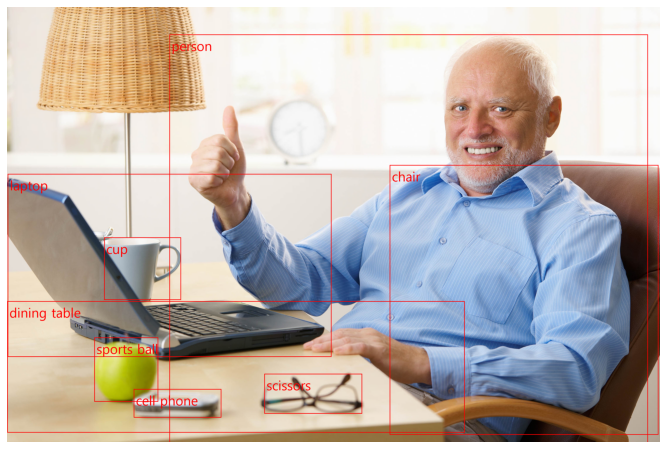

In [30]:
plt.figure(figsize=(12,8))
plt.axis('off')
plt.imshow(img);